# TASK1

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/4ML/MSA_nat_with_annotation.faa'
art_file_path = '/content/drive/MyDrive/4ML/MSA_art.faa'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np

# 定义标准氨基酸表
AMINO_ACIDS = "ACDEFGHIKLMNPQRSTVWY"
AMINO_MAP = {aa: i for i, aa in enumerate(AMINO_ACIDS)}

def parse_fasta(file_path):
    sequences = []
    labels = []
    current_seq = []
    current_label = None

    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(">"):  # Header line
                if current_seq and current_label is not None:
                    sequences.append("".join(current_seq))
                    labels.append(current_label)
                    current_seq = []

                # Extract label
                if "functional_true" in line:
                    current_label = 1.0
                elif "functional_false" in line:
                    current_label = 0.0
                else:
                    #raise ValueError(f"Unknown functional label in header: {line}")
                    current_label = 2.0
            else:
                # Sequence line
                current_seq.append(line)

        # Append the last sequence
        if current_seq and current_label is not None:
            sequences.append("".join(current_seq))
            labels.append(current_label)

    return sequences, labels

def one_hot_encode_sequence(sequence):
    """将蛋白质序列转换为独热编码"""
    one_hot = np.zeros((len(sequence), 20), dtype=int)
    for i, aa in enumerate(sequence):
        if aa in AMINO_MAP:
            one_hot[i, AMINO_MAP[aa]] = 1
    return one_hot

def process_fasta(file_path):
    sequences, labels = parse_fasta(file_path)
    encoded_sequences = [one_hot_encode_sequence(seq) for seq in sequences]
    return encoded_sequences, np.array(labels)


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 输出所有结果
temp_se,temp_labels = process_fasta(art_file_path)
print(temp_se)


[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
   

# TASK2

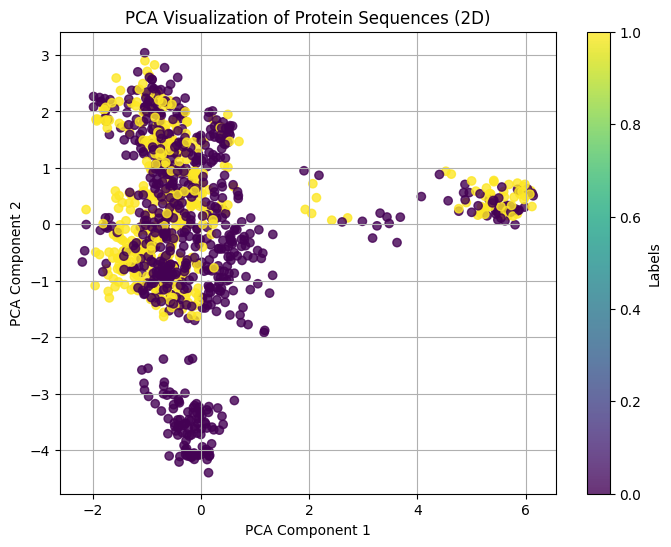

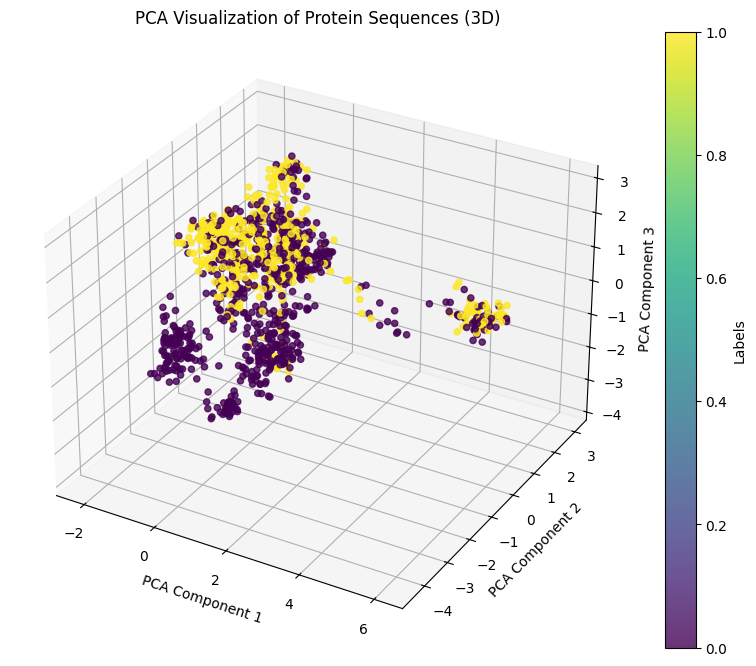

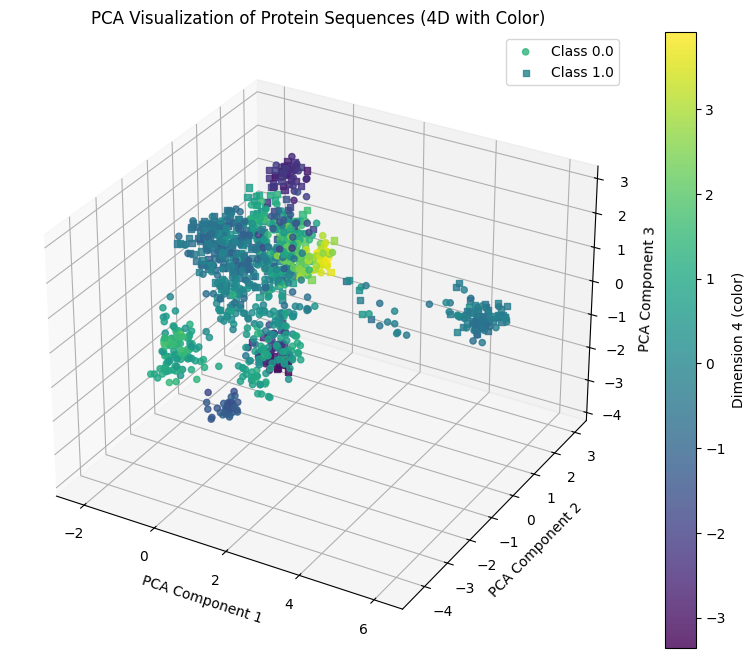

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def visualize_pca(data, labels, title="PCA Visualization"):
    """
    可视化 PCA 降维结果的函数。

    参数:
    - data: PCA 降维后的数据，形状为 (n_samples, n_components)，支持 2D 或更高维度
    - labels: 每个样本的类别标签，形状为 (n_samples,)
    - title: 图形标题（可选）
    """
    n_components = data.shape[1]
    unique_labels = np.unique(labels)
    markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'h']  # 支持多类别的点形状
    if n_components == 2:
        # 二维可视化
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.8)
        plt.colorbar(scatter, label='Labels')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.title(f'{title} (2D)')
        plt.grid(True)
        plt.show()

    elif n_components == 3:
        # 三维可视化
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        scatter = ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, cmap='viridis', alpha=0.8)
        fig.colorbar(scatter, label='Labels')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (3D)')
        plt.show()
    elif n_components >= 4:
        # 四维可视化，使用颜色表示第 4 维，形状表示类别
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i, label in enumerate(unique_labels):
            idx = labels == label
            scatter = ax.scatter(data[idx, 0], data[idx, 1], data[idx, 2],
                                  c=data[idx, 3], cmap='viridis',
                                  marker=markers[i % len(markers)], alpha=0.8, label=f'Class {label}')
        cbar = fig.colorbar(scatter, ax=ax, label='Dimension 4 (color)')
        ax.set_xlabel('PCA Component 1')
        ax.set_ylabel('PCA Component 2')
        ax.set_zlabel('PCA Component 3')
        ax.set_title(f'{title} (4D with Color)')
        ax.legend()
        plt.show()
    else:
        print("PCA 降维结果必须至少有两维数据用于可视化。")

def Pca_visual(encoded_sequences, labels,components):
    """
    使用PCA进行降维并可视化序列数据。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 对应的功能性标签 (0表示非功能性，1表示功能性)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至3个主成分
    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(encoded_sequences)
    visualize_pca(pca_result, labels, title="PCA Visualization of Protein Sequences")

# 读取FASTA文件、编码序列并进行PCA可视化
encoded_sequences, labels = process_fasta(file_path)
#pca_visualization(encoded_sequences, labels)
Pca_visual(encoded_sequences, labels,2)
Pca_visual(encoded_sequences, labels,3)
Pca_visual(encoded_sequences, labels,4)

<BarContainer object of 1130 artists>

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

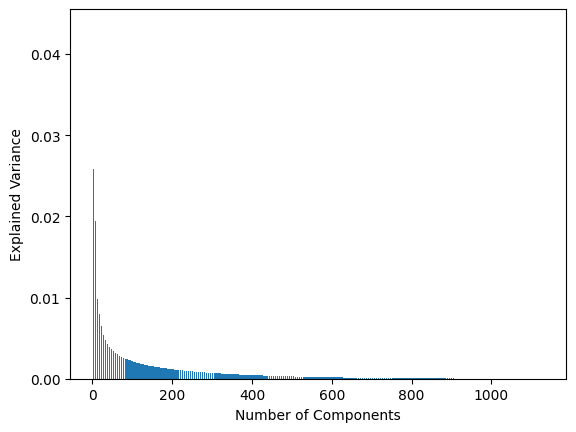

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Cumulative Explained Variance')

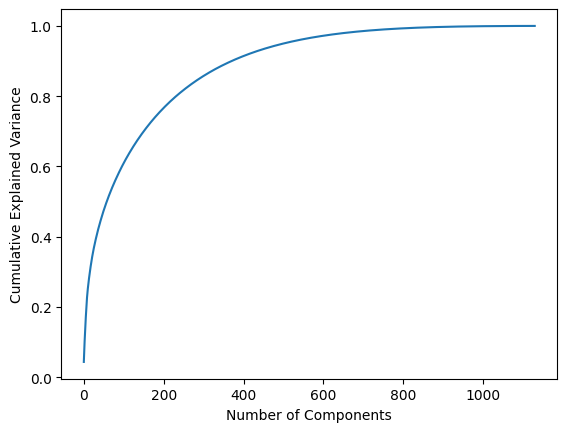

In [6]:
# Fit PCA without specifying the number of components to compute variance ratios for all components
X = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA().fit(X)

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()

# Plot the cumulative explained variance as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))  # Cumulative sum of explained variance
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# TASK3

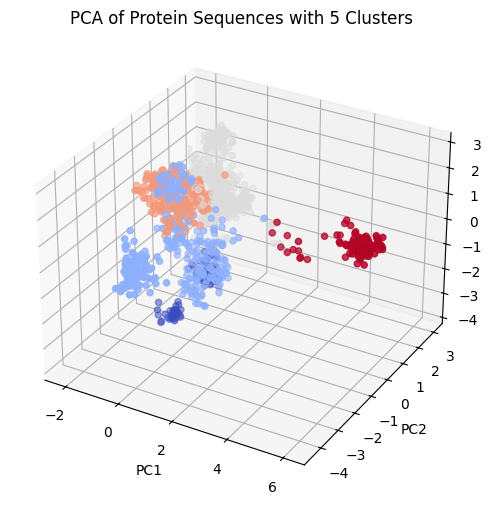

In [7]:
from sklearn.cluster import KMeans
def pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=2):
    """
    使用PCA进行降维、聚类并可视化结果。
    :param encoded_sequences: 独热编码后的序列
    :param labels: 功能性标签 (0表示非功能性，1表示功能性)
    :param n_clusters: 聚类数 (默认3个聚类)
    """
    # 将序列列表转换为二维数组 (样本数, 特征数)
    encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)

    # 使用PCA降维至20个主成分
    pca = PCA(n_components=600)
    pca_result = pca.fit_transform(encoded_sequences)

    # 使用KMeans聚类
    kmeans = KMeans(n_clusters=n_clusters,max_iter=2000000)
    cluster_labels = kmeans.fit_predict(pca_result)

    # 可视化PCA降维结果与聚类

    #根据聚类结果绘制数据点绘制三维图
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=cluster_labels, cmap='coolwarm')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    plt.title('PCA Visualization of Protein Sequences')
    plt.title(f'PCA of Protein Sequences with {n_clusters} Clusters')
    plt.show()

encoded_sequences, labels = process_fasta(file_path)

pca_visualization_with_clusters(encoded_sequences, labels, n_clusters=5)

In [8]:
#判断聚类的准确性，评判方法是把聚类结果映射到准确率最高的标签上
def evaluate_cluster_accuracy(true_labels, cluster_labels):
    """
    计算聚类结果的准确性。
    :param true_labels: 真实的标签
    :param cluster_labels: 聚类结果的标签
    :return: 聚类准确性
    """
    #标签从float转换为int
    true_labels = true_labels.astype(int)
    cluster_labels = cluster_labels.astype(int)
    # 计算每个聚类的主要标签
    cluster_mapping = {}
    for cluster in np.unique(cluster_labels):
        mask = cluster_labels == cluster
        counts = np.bincount(true_labels[mask])
        cluster_mapping[cluster] = np.argmax(counts)

    # 映射聚类标签到真实标签
    mapped_labels = np.array([cluster_mapping[label] for label in cluster_labels])

    # 计算准确性
    accuracy = np.mean(mapped_labels == true_labels)
    return accuracy
#生成聚类结果并评估准确性
#If need to determine whether to mix manual and natural datasets, change this path to mixed.faa
encoded_sequences, labels = process_fasta(file_path)
encoded_sequences = np.array(encoded_sequences).reshape(len(encoded_sequences), -1)
pca = PCA(n_components=600)
pca_result = pca.fit_transform(encoded_sequences)
kmeans = KMeans(n_clusters=2,max_iter=2000000)
cluster_labels = kmeans.fit_predict(pca_result)
print(cluster_labels)
print(cluster_labels.shape)
accuracy = evaluate_cluster_accuracy(labels, cluster_labels)
print(f"Cluster accuracy: {accuracy:.2f}")

[1 1 0 ... 0 0 0]
(1130,)
Cluster accuracy: 0.63


# TASK4

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn.functional as F


class ProteinClassifier(nn.Module):
    def __init__(self, input_dim):
        super(ProteinClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

def GetAndSavePCAAndScalerData(encoded_sequences,n_components=50):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)
    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)
    #归一化数据，使得数据的均值为0，方差为
    scaler1 = StandardScaler()
    sequences_scaled = scaler1.fit_transform(encoded_sequences)
    # PCA降维
    pca = PCA(n_components=n_components)
    sequences_pca = pca.fit_transform(sequences_scaled)
    #再次进行归一化
    scaler2 = StandardScaler()
    sequences_pca = scaler2.fit_transform(sequences_pca)
    return scaler1,scaler2,pca
def apply_pca(encoded_sequences,scaler1,scaler2,pca):
    """
    对独热编码后的序列进行PCA降维。
    :param encoded_sequences: 独热编码后的序列，可能是三维数组
    :param n_components: PCA降维的目标维度
    :return: 降维后的序列
    """
    # 确保输入是一个 NumPy 数组
    encoded_sequences = np.array(encoded_sequences)

    # 如果是三维数据，则将其展平为二维
    if len(encoded_sequences.shape) == 3:
        batch_size, seq_length, feature_dim = encoded_sequences.shape
        encoded_sequences = encoded_sequences.reshape(batch_size, seq_length * feature_dim)

    #归一化数据，使得数据的均值为0，方差为
    sequences_scaled = scaler1.transform(encoded_sequences)
    # PCA降维
    sequences_pca = pca.transform(sequences_scaled)
    #再次进行归一化
    sequences_pca = scaler2.transform(sequences_pca)
    return sequences_pca


def prepare_data(train_data, test_data, use_pca=True, n_components=20):
    """
    根据是否使用PCA降维，准备训练和测试数据，转换为PyTorch的Tensor。
    """
    if use_pca:
        scaler1,scaler2,pca = GetAndSavePCAAndScalerData(train_data[0],n_components)
        X_train = apply_pca(train_data[0],scaler1,scaler2,pca)
        X_test = apply_pca(test_data[0],scaler1,scaler2,pca)
    else:
        X_train = train_data[0]
        X_test = test_data[0]

    # 转换为Tensor格式
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(train_data[1], dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(test_data[1], dtype=torch.float32).view(-1, 1)

    return X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor


def train_model(model, train_loader, criterion, optimizer, device, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # 前向传播
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # 反向传播 + 优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')


def test_model(model, X_input, device):
    model.eval()
    y_pred = []

    with torch.no_grad():
        for inputs in X_input:
            inputs = inputs.to(device)
            outputs = model(inputs)
            predictions = (outputs > 0.5).float()
            y_pred.extend(predictions.cpu().numpy())

    return  y_pred



In [10]:

train_data = process_fasta(file_path)
test_data = process_fasta(art_file_path)

X_train, y_train, X_test, y_test = prepare_data(train_data, test_data, use_pca=True, n_components=40)

train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

input_dim = X_train.shape[1]
model = ProteinClassifier(input_dim)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.BCELoss()  # 二分类交叉熵损失
#class_weights = torch.tensor([1.0, 2.0], dtype=torch.float32).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# 训练模型
train_model(model, train_loader, criterion, optimizer, device, num_epochs=200)

ProteinClassifier(
  (fc1): Linear(in_features=40, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

Epoch [1/200], Loss: 0.7188
Epoch [2/200], Loss: 0.7087
Epoch [3/200], Loss: 0.7059
Epoch [4/200], Loss: 0.6994
Epoch [5/200], Loss: 0.6882
Epoch [6/200], Loss: 0.6726
Epoch [7/200], Loss: 0.6651
Epoch [8/200], Loss: 0.6558
Epoch [9/200], Loss: 0.6405
Epoch [10/200], Loss: 0.6186
Epoch [11/200], Loss: 0.6039
Epoch [12/200], Loss: 0.5949
Epoch [13/200], Loss: 0.5726
Epoch [14/200], Loss: 0.5704
Epoch [15/200], Loss: 0.5622
Epoch [16/200], Loss: 0.5456
Epoch [17/200], Loss: 0.5309
Epoch [18/200], Loss: 0.5309
Epoch [19/200], Loss: 0.5098
Epoch [20/200], Loss: 0.5268
Epoch [21/200], Loss: 0.5095
Epoch [22/200], Loss: 0.5006
Epoch [23/200], Loss: 0.4928
Epoch [24/200], Loss: 0.4884
Epoch [25/200], Loss: 0.4820
Epoch [26/200], Loss: 0.4758
Epoch [27/200], Loss: 0.4679
Epoch [28/200], Loss: 0.4652
Epoch [29/200], Loss: 0.4640
Epoch [30/200], Loss: 0.4721
Epoch [31/200], Loss: 0.4681
Epoch [32/200], Loss: 0.4738
Epoch [33/200], Loss: 0.4472
Epoch [34/200], Loss: 0.4735
Epoch [35/200], Loss: 0

[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,

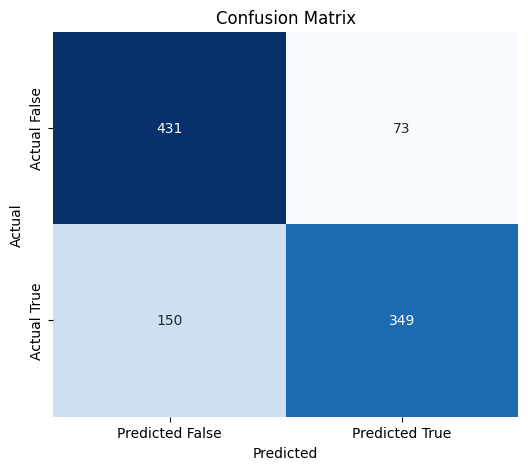

In [11]:
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
def evaluate_model(y_true, y_pred):
    """
    评估模型效果，输出混淆矩阵并提取 TP, FP, TN, FN
    :param y_true: 真实标签
    :param y_pred: 预测标签
    :return: None
    """
    # 计算混淆矩阵
    #y_true = y_true.to(device)
    #y_pred = y_pred.to(device)
    cm = confusion_matrix(y_true, y_pred)

    # 提取 TP, FP, TN, FN
    TN, FP, FN, TP = cm.ravel()

    # 输出混淆矩阵
    print("Confusion Matrix:")
    print(cm)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"True Positive (TP): {TP}")
    print(f"False Positive (FP): {FP}")
    print(f"True Negative (TN): {TN}")
    print(f"False Negative (FN): {FN}")

    # 可视化混淆矩阵
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted False', 'Predicted True'],
                yticklabels=['Actual False', 'Actual True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
# 测试模型
y_pred = test_model(model, X_test, device)
print(y_pred)
# 将 PyTorch 张量转换为 NumPy 数组
y_true = y_test.cpu().numpy().flatten()  # 使用 flatten() 转换为一维数组
evaluate_model(y_true, y_pred)

# TASK5

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ProteinSequenceGenerator(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, max_seq_len):
        super(ProteinSequenceGenerator, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.max_seq_len = max_seq_len

    def forward(self, x):
        """
        训练时直接返回 logits（未经过 argmax），
        这样可以让梯度通过 fc -> LSTM -> embedding 反传
        """
        x = self.embedding(x)                   # [batch_size, seq_len, embed_dim]
        lstm_out, _ = self.lstm(x)              # [batch_size, seq_len, hidden_dim]
        logits = self.fc(lstm_out)              # [batch_size, seq_len, output_dim]
        return logits

    def generate_sequence(self, seed, max_seq_len=None, temperature=1.0, use_gumbel=False):
        """
        推理/采样函数：
        - 如果需要随机性，可以用 Gumbel-Softmax + argmax
        - 如果只想要最有可能的序列，可以直接 argmax
        """
        self.eval()
        with torch.no_grad():
            if max_seq_len is None:
                max_seq_len = self.max_seq_len

            # seed 形状: [batch_size, seq_len]
            logits = self.forward(seed)  # [batch_size, seq_len, output_dim]

            if use_gumbel:
                # 使用 Gumbel-Softmax 采样 (hard=True 生成 one-hot，但梯度可近似传播)
                # 不过这里是 inference，所以 with no_grad() 本身就不需要梯度
                gumbel_sample = F.gumbel_softmax(logits, tau=temperature, dim=-1, hard=True)
                # argmax 得到最终 token
                generated_seq = torch.argmax(gumbel_sample, dim=-1)
            else:
                # 直接取 argmax
                probs = F.softmax(logits, dim=-1)
                generated_seq = torch.argmax(probs, dim=-1)

            return generated_seq


# 定义判别器（Discriminator）模型
class ProteinSequenceDiscriminator(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.linear_in = nn.Linear(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x_onehot):
        # x_onehot: [batch_size, seq_len, vocab_size]
        # 线性映射，把 vocab_size -> embed_dim
        x_embed = self.linear_in(x_onehot)
        lstm_out, _ = self.lstm(x_embed)
        out = self.fc(lstm_out[:, -1, :])
        return torch.sigmoid(out)

In [18]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch
import os

# 定义氨基酸字母表和映射
AMINO_ACID_ALPHABET = 'ACDEFGHIKLMNPQRSTVWY-'  # 20个标准氨基酸
AA_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACID_ALPHABET)}  # 字符到索引的映射
IDX_TO_AA = {i: aa for i, aa in enumerate(AMINO_ACID_ALPHABET)}  # 索引到字符的映射
END_IDX = len(AMINO_ACID_ALPHABET)  # 结束符的特殊索引
ALL_IDX = list(AA_TO_IDX.values()) + [END_IDX]  # 包含结束符的索引

# 读取并处理蛋白质序列
def load_protein_data(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i in range(0, len(lines), 2):  # 每两个行一组
            sequence = lines[i + 1].strip()  # 获取蛋白质序列
            # 合并多行蛋白质序列（处理换行符）
            full_sequence = ''.join(sequence.split())  # 移除所有换行符
            sequences.append(full_sequence)
    return sequences

# 将氨基酸序列转换为模型输入的张量
def amino_acid_to_tensor(sequence):
    """将氨基酸序列转换为模型输入的张量"""
    tensor = torch.tensor([AA_TO_IDX.get(aa, END_IDX) for aa in sequence])  # 如果是 gap 使用 END_IDX
    return tensor.unsqueeze(0)  # 返回一个 batch 的维度

# 加载并处理数据
protein_sequences = load_protein_data(art_file_path)

# 将所有蛋白质序列转换为张量
sequence_tensors = [amino_acid_to_tensor(seq) for seq in protein_sequences]
# 定义一个自定义数据集
class ProteinSequenceDataset(Dataset):
    def __init__(self, sequences, aa_to_idx, max_seq_len):
        self.sequences = sequences
        self.aa_to_idx = aa_to_idx
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        tensor = torch.tensor(
            [self.aa_to_idx.get(aa, END_IDX) for aa in sequence]
        )  # 将氨基酸序列转为索引
        # 如果序列不足 max_seq_len，则填充 END_IDX
        padded_tensor = torch.full((self.max_seq_len,), END_IDX, dtype=torch.long)
        padded_tensor[:len(tensor)] = tensor
        return padded_tensor

protein_sequences = load_protein_data(art_file_path)
dataset = ProteinSequenceDataset(protein_sequences, AA_TO_IDX, max_seq_len=96)
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)  # 批次大小设置为16


In [25]:
# 定义生成器和判别器的优化器和损失函数
generator = ProteinSequenceGenerator(len(ALL_IDX), embedding_dim=64, hidden_dim=128, output_dim=len(ALL_IDX), max_seq_len=96).to(device)
discriminator = ProteinSequenceDiscriminator(
    vocab_size=len(ALL_IDX),
    embed_dim=64,
    hidden_dim=128
).to(device)

criterion = nn.BCELoss()  # 二元交叉熵损失
optimizer_G = optim.Adam(generator.parameters(), lr=1e-4, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=1e-4, betas=(0.5, 0.999))


# 生成一个种子序列并将其转换为张量
def amino_acid_to_tensor(sequence):
    """将氨基酸序列转换为模型输入的张量"""
    tensor = torch.tensor([AA_TO_IDX.get(aa, END_IDX) for aa in sequence])  # 如果是 gap 使用 END_IDX
    return tensor.unsqueeze(0)  # 返回一个 batch 的维度
import torch.nn.functional as F

# 这里用 "hard Gumbel-Softmax" 采样来获得 fake_sequence
# 并保证生成器可以通过近似梯度更新
def sample_fake_sequence(logits, temperature=1.0):
    """
    logits: [batch_size, seq_len, vocab_size]
    返回 (discrete_tokens, gumbel_one_hot)
    - discrete_tokens: 给判别器用的整型 token
    - gumbel_one_hot: 在 backward 时用于近似梯度
    """
    gumbel_sample = F.gumbel_softmax(logits, tau=temperature, dim=-1, hard=True)
    # discrete tokens (batch_size, seq_len)
    discrete_tokens = torch.argmax(gumbel_sample, dim=-1)
    return discrete_tokens, gumbel_sample



# 用于存放训练过程中的各种指标
d_real_probs = []       # 判别器对真实样本的平均判定概率
d_fake_probs = []       # 判别器对假样本的平均判定概率
g_losses = []           # 生成器损失
d_losses = []           # 判别器损失
g_grad_norms = []       # 生成器梯度范数 (grad norm)
# ----------------------- GAN 训练循环 -----------------------
num_epochs = 100
for epoch in range(num_epochs):
    epoch_d_real = 0.0
    epoch_d_fake = 0.0
    epoch_g_loss = 0.0
    epoch_d_loss = 0.0
    batch_count = 0
    for real_sequences in data_loader:
        batch_size = real_sequences.size(0)
        batch_count += 1

        # ================== 训练判别器 ==================
        optimizer_D.zero_grad()

        # 1) 判别器在真实序列上的损失
        real_sequences = real_sequences.to(device)
        real_onehot = F.one_hot(real_sequences, num_classes=len(ALL_IDX)).float()
        real_output = discriminator(real_onehot)
        #real_label = torch.ones(batch_size, 1, device=device)
        real_label = torch.full((batch_size, 1), 0.9, device=device)  # example
        real_loss = criterion(real_output, real_label)

        # 2) 判别器在假序列上的损失
        # 先让生成器输出 logits
        noise = torch.randint(0, len(ALL_IDX), (batch_size, 96), device=device)
        fake_logits = generator(noise)  # [batch_size, seq_len, vocab_size]

        # 用 Gumbel-Softmax 得到假序列 (离散 token) + one-hot
        fake_sequences_idx, fake_sequences_onehot = sample_fake_sequence(fake_logits, temperature=1.0)
        # 判别器输入需要 整型 索引
        fake_output = discriminator(fake_sequences_onehot)
        #fake_label = torch.zeros(batch_size, 1, device=device)
        fake_label = torch.full((batch_size, 1), 0.1, device=device)
        fake_loss = criterion(fake_output, fake_label)

        # 判别器总损失
        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()
        # （在optimizer_G.step()前获取当前梯度情况）
        total_norm = 0.0
        for p in generator.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        # ================== 训练生成器 ==================
        optimizer_G.zero_grad()

        # 重新生成假序列（需保留梯度）
        fake_logits = generator(noise)
        fake_sequences_idx, fake_sequences_onehot = sample_fake_sequence(fake_logits, temperature=1.0)

        # 判别器对假序列的判别结果
        output = discriminator(fake_sequences_onehot)
        # 希望判别器输出接近 1
        g_loss = criterion(output, real_label)

        g_loss.backward()
        optimizer_G.step()
        # 累加指标以便做 epoch 平均
        epoch_d_real += real_output.mean().item()
        epoch_d_fake += fake_output.mean().item()
        epoch_d_loss += d_loss.item()
        epoch_g_loss += g_loss.item()
        g_grad_norms.append(total_norm)   # 若想画曲线，也可在 epoch 外部加 list

    # 计算本 epoch 内几个指标的平均值
    epoch_d_real /= batch_count
    epoch_d_fake /= batch_count
    epoch_d_loss /= batch_count
    epoch_g_loss /= batch_count

    d_real_probs.append(epoch_d_real)
    d_fake_probs.append(epoch_d_fake)
    d_losses.append(epoch_d_loss)
    g_losses.append(epoch_g_loss)

    # 打印本 epoch 的数值
    print(f"Epoch [{epoch}/{num_epochs}], "
          f"D(real)={epoch_d_real:.4f}, D(fake)={epoch_d_fake:.4f}, "
          f"D Loss={epoch_d_loss:.4f}, G Loss={epoch_g_loss:.4f}, "
          f"G Grad Norm(last batch)={total_norm:.4f}")
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch [0/100], D(real)=0.5916, D(fake)=0.4761, D Loss=1.2954, G Loss=0.7556, G Grad Norm(last batch)=0.1238
Epoch [0/100], D Loss: 1.4232, G Loss: 0.8730
Epoch [1/100], D(real)=0.4480, D(fake)=0.4485, D Loss=1.4018, G Loss=0.7809, G Grad Norm(last batch)=0.0143
Epoch [2/100], D(real)=0.4743, D(fake)=0.4774, D Loss=1.3937, G Loss=0.7303, G Grad Norm(last batch)=0.0130
Epoch [3/100], D(real)=0.4844, D(fake)=0.4859, D Loss=1.3897, G Loss=0.7160, G Grad Norm(last batch)=0.0125
Epoch [4/100], D(real)=0.4905, D(fake)=0.4914, D Loss=1.3881, G Loss=0.7071, G Grad Norm(last batch)=0.0160
Epoch [5/100], D(real)=0.4942, D(fake)=0.4947, D Loss=1.3872, G Loss=0.7017, G Grad Norm(last batch)=0.0104
Epoch [6/100], D(real)=0.4964, D(fake)=0.4966, D Loss=1.3867, G Loss=0.6985, G Grad Norm(last batch)=0.0048
Epoch [7/100], D(real)=0.4977, D(fake)=0.4979, D Loss=1.3866, G Loss=0.6967, G Grad Norm(last batch)=0.0049
Epoch [8/100], D(real)=0.4985, D(fake)=0.4986, D Loss=1.3864, G Loss=0.6955, G Grad Norm(l

In [29]:
noise = torch.randint(0, len(ALL_IDX), (1, 96)).long().to(device)  # 随机生成一个种子
generated_sequence = generator.generate_sequence(noise, max_seq_len=96)

# 将生成的张量转换回氨基酸序列
def tensor_to_amino_acid(tensor):
    return ''.join([IDX_TO_AA[idx.item()] if idx.item() < len(AMINO_ACID_ALPHABET) else '-' for idx in tensor.squeeze()])
generated_protein_sequence = tensor_to_amino_acid(generated_sequence)
print(f"Generated Protein Sequence: {generated_protein_sequence}")
#生成一系列蛋白质序列
generated_list = []
for i in range(100):
    noise = torch.randint(0, len(ALL_IDX), (1, 96)).long().to(device)  # 随机生成一个种子
    generated_sequence = generator.generate_sequence(noise, max_seq_len=96)
    generated_protein_sequence = tensor_to_amino_acid(generated_sequence)
    generated_list.append(generated_sequence)


Generated Protein Sequence: ------------------------------------------------------------------------------------------------


In [15]:
# 检验是否是功能序列
generateddata = [one_hot_encode_sequence(seq) for seq in generated_list]
temp = np.array([0])
generateddata = [generateddata,temp]
X_generated,_,_,_ = prepare_data(generateddata, generateddata, use_pca=True, n_components=40)
print(X_generated.shape)
# 生成数据的预测
y_generated = test_model(model, X_generated,device)
print(y_generated)

torch.Size([100, 40])
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/4ML/MSA_nat_with_annotation.faa'
art_file_path = '/content/drive/MyDrive/4ML/MSA_art.faa'
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import random

#########################################
#            1. 数据处理                #
#########################################

# 假设你的蛋白质字母表(包含END或其他特殊符号)
AMINO_ACID_ALPHABET = 'ACDEFGHIKLMNPQRSTVWY-'  # 20个氨基酸 + '-'
AA_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACID_ALPHABET)}
IDX_TO_AA = {i: aa for aa, i in AA_TO_IDX.items()}

VOCAB_SIZE = len(AMINO_ACID_ALPHABET)   # 不额外加END，若要加可自己插入
SEQ_LEN = 96

class ProteinDataset(Dataset):
    """
    将蛋白质序列（长度固定为96）的文件读入，并存为 [seq_len] 的长整型索引张量
    """
    def __init__(self, file_path):
        self.sequences = []
        with open(file_path, 'r') as f:
            lines = f.readlines()
            # 假设每行就是一个蛋白序列(或每2行有一行是名字,一行是序列; 你可根据实际情况修改)
            for line in lines:
                seq = line.strip()
                if len(seq) == 0:
                    continue
                # 若实际数据量是 2 行一组(描述+序列)，可做额外处理
                # 这里示例假设就是一行一个序列
                self.sequences.append(seq)

        # 将序列转成索引，并确保长度=96
        # 若实际序列长度<96可用某个符号补齐，也可直接断开
        self.data = []
        for seq in self.sequences:
            # 只取前96或截断/补齐
            seq = seq[:SEQ_LEN].ljust(SEQ_LEN, '-')
            # 转索引
            idx_list = [AA_TO_IDX.get(aa, AA_TO_IDX['-']) for aa in seq]
            self.data.append(torch.tensor(idx_list, dtype=torch.long))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]


#########################################
#         2. 定义 Generator             #
#########################################
class ProteinGenerator(nn.Module):
    """
    输入: [batch_size, seq_len] (整数索引, 也可以是噪声)
    输出: [batch_size, seq_len, vocab_size] (logits)
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim, seq_len=96):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.seq_len = seq_len

    def forward(self, x):
        """
        x: [batch_size, seq_len], long
        返回 logits: [batch_size, seq_len, vocab_size]
        """
        emb = self.embedding(x)
        lstm_out, _ = self.lstm(emb)
        logits = self.fc(lstm_out)
        return logits

    @torch.no_grad()
    def sample(self, x, temperature=1.0):
        """
        推理/采样函数:
        直接返回 argmax 采样或 Gumbel-Softmax(无梯度)
        x: [batch_size, seq_len], long
        返回: [batch_size, seq_len], long
        """
        self.eval()
        logits = self.forward(x)  # [B, seq_len, vocab_size]
        if temperature == 1.0:
            # 简单argmax
            pred = logits.argmax(dim=-1)
        else:
            # softmax采样
            probs = F.softmax(logits / temperature, dim=-1)
            pred = torch.multinomial(probs.view(-1, probs.size(-1)), 1).view(logits.size(0), -1)
        return pred


#########################################
#        3. 定义 Discriminator          #
#########################################
class ProteinDiscriminator(nn.Module):
    """
    此处采用 one-hot输入 -> Linear -> LSTM -> FC
    因此需要在外部把真实/假序列都转成 one-hot float.
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super().__init__()
        self.linear_in = nn.Linear(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x_onehot):
        """
        x_onehot: [batch_size, seq_len, vocab_size], float
        """
        emb = self.linear_in(x_onehot)      # [B, seq_len, embed_dim]
        lstm_out, _ = self.lstm(emb)
        out = self.fc(lstm_out[:, -1, :])   # 只取最后一步来做真假判别
        return torch.sigmoid(out)


#########################################
#      4. Gumbel-Softmax采样函数       #
#########################################
def sample_gumbel(logits, temperature=1.0):
    """
    logits: [B, seq_len, vocab_size]
    返回: onehot (hard=True), shape同logits
          discrete_idx: [B, seq_len]
    """
    gumbel_sample = F.gumbel_softmax(logits, tau=temperature, dim=-1, hard=True)
    discrete_idx = gumbel_sample.argmax(dim=-1)
    return gumbel_sample, discrete_idx


#########################################
#   5. 训练循环 (对比+可直接运行示例)   #
#########################################
def train_gan(
    file_path,
    vocab_size=VOCAB_SIZE,
    seq_len=SEQ_LEN,
    embed_dim=64,
    hidden_dim=128,
    batch_size=16,
    num_epochs=100,
    lr_d=1e-4,
    lr_g=2e-4,
    smoothing_real=0.9,
    smoothing_fake=0.0,
    temperature=1.0,
    lambda_mle=0.0,   # 若想加一些MLE Loss, 可调大
    device='cuda'
):
    # === 5.1 构建数据集与 DataLoader ===
    dataset = ProteinDataset(file_path)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # === 5.2 构建模型 ===
    generator = ProteinGenerator(vocab_size, embed_dim, hidden_dim, seq_len).to(device)
    discriminator = ProteinDiscriminator(vocab_size, embed_dim, hidden_dim).to(device)

    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))
    bce = nn.BCELoss()

    # 如果要引入交叉熵(类似语言模型), 用这个:
    def mle_loss(gen_logits, target):
        # gen_logits: [B, seq_len, vocab_size]
        # target: [B, seq_len]
        B, L, V = gen_logits.shape
        gen_logits_2d = gen_logits.view(B*L, V)
        target_2d = target.view(-1)
        return F.cross_entropy(gen_logits_2d, target_2d)

    # === 5.3 训练循环 ===
    for epoch in range(num_epochs):
        d_real_total = 0.0
        d_fake_total = 0.0
        d_loss_total = 0.0
        g_loss_total = 0.0
        batch_count = 0
        g_grad_norms = []       # 生成器梯度范数 (grad norm)
        for real_seq in data_loader:
            batch_count += 1
            batch_size_ = real_seq.size(0)
            real_seq = real_seq.to(device)

            # ================== 训练判别器 ==================
            optimizer_D.zero_grad()

            # 1) 判别器在真实序列上的损失
            # 把 real_seq -> one-hot float
            real_onehot = F.one_hot(real_seq, num_classes=vocab_size).float()  # [B, seq_len, vocab_size]
            real_output = discriminator(real_onehot)
            real_label = torch.full((batch_size_, 1), smoothing_real, device=device)  # label smoothing
            real_loss = bce(real_output, real_label)

            # 2) 判别器在假序列上的损失
            # 用generator生成 logits -> gumbel onehot
            noise_input = torch.randint(0, vocab_size, (batch_size_, seq_len), device=device)
            fake_logits = generator(noise_input)
            fake_onehot, fake_idx = sample_gumbel(fake_logits, temperature=temperature)

            fake_output = discriminator(fake_onehot)
            fake_label = torch.full((batch_size_, 1), smoothing_fake, device=device)
            fake_loss = bce(fake_output, fake_label)

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_D.step()

            d_loss_total += d_loss.item()
            d_real_total += real_output.mean().item()
            d_fake_total += fake_output.mean().item()
            total_norm = 0.0
            for p in generator.parameters():
                if p.grad is not None:
                    param_norm = p.grad.data.norm(2)
                    total_norm += param_norm.item() ** 2
            total_norm = total_norm ** 0.5
            # ================== 训练生成器 ==================
            optimizer_G.zero_grad()

            # 生成对抗损失: 希望判别器判别 fake 为 “真”
            fake_logits_2 = generator(noise_input)
            fake_onehot_2, fake_idx_2 = sample_gumbel(fake_logits_2, temperature=temperature)
            g_out = discriminator(fake_onehot_2)

            # label smoothing 同真实的一样
            g_loss_adv = bce(g_out, real_label)

            # 如果要加 MLE (额外交叉熵)，让生成器学会与真实序列贴近
            if lambda_mle > 0.0:
                gen_logits_mle = generator(real_seq)  # teacher forcing: 用真实序列做输入
                mle = mle_loss(gen_logits_mle, real_seq)
                g_loss = g_loss_adv + lambda_mle * mle
            else:
                g_loss = g_loss_adv

            g_loss.backward()
            optimizer_G.step()
            g_loss_total += g_loss.item()

        # === epoch 结束，输出日志 ===
        d_real_avg = d_real_total / batch_count
        d_fake_avg = d_fake_total / batch_count
        d_loss_avg = d_loss_total / batch_count
        g_loss_avg = g_loss_total / batch_count

        print(f"Epoch [{epoch}/{num_epochs}], "
              f"D(real)={d_real_avg:.4f}, D(fake)={d_fake_avg:.4f}, "
              f"D Loss={d_loss_avg:.4f}, G Loss={g_loss_avg:.4f}"
              f"G Grad Norm(last batch)={total_norm:.4f}")

        # === 可选：每隔若干轮，生成几条假序列看看 ===
        if (epoch+1) % 10 == 0:
            # 随机生成一个batch的噪声
            test_noise = torch.randint(0, vocab_size, (4, seq_len), device=device)
            with torch.no_grad():
                sample_logits = generator(test_noise)
                sample_onehot, sample_idx = sample_gumbel(sample_logits, temperature=temperature)
            # 转成氨基酸字符串
            for i in range(4):
                seq_tokens = sample_idx[i].tolist()
                seq_str = ''.join(IDX_TO_AA[t] for t in seq_tokens)
                print(f"  [Sample {i}] {seq_str}")


#########################################
#   6. 主函数示例(直接调用train_gan)   #
#########################################
if __name__ == "__main__":
    # 假设你的蛋白质序列文件是 "proteins.txt"，
    # 里面共1000条，每条长度=96 (或更长，你截断)
    file_path = "/content/drive/MyDrive/4ML/functional_false.faa"

    train_gan(
        file_path=file_path,
        vocab_size=VOCAB_SIZE,   # 这里= len(AMINO_ACID_ALPHABET)
        seq_len=SEQ_LEN,         # 96
        embed_dim=64,
        hidden_dim=128,
        batch_size=16,
        num_epochs=1000,
        lr_d=1e-4,               # 可以调更低避免判别器过强
        lr_g=2e-4,
        smoothing_real=0.9,
        smoothing_fake=0.0,      # 可设成0.1等
        temperature=1.0,         # 可尝试2.0以上
        lambda_mle=0.1,          # 给点mle权重，避免只输出 '-'
        device='cuda'
    )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch [0/1000], D(real)=0.4959, D(fake)=0.4758, D Loss=1.3459, G Loss=0.9908G Grad Norm(last batch)=0.0698
Epoch [1/1000], D(real)=0.5007, D(fake)=0.4565, D Loss=1.3060, G Loss=1.0013G Grad Norm(last batch)=0.2510
Epoch [2/1000], D(real)=0.4520, D(fake)=0.4513, D Loss=1.3752, G Loss=0.9653G Grad Norm(last batch)=0.1512
Epoch [3/1000], D(real)=0.4507, D(fake)=0.4499, D Loss=1.3748, G Loss=0.9446G Grad Norm(last batch)=0.1279
Epoch [4/1000], D(real)=0.4501, D(fake)=0.4498, D Loss=1.3758, G Loss=0.9240G Grad Norm(last batch)=0.0469
Epoch [5/1000], D(real)=0.4502, D(fake)=0.4496, D Loss=1.3751, G Loss=0.9047G Grad Norm(last batch)=0.1194
Epoch [6/1000], D(real)=0.4497, D(fake)=0.4482, D Loss=1.3735, G Loss=0.8906G Grad Norm(last batch)=0.0444
Epoch [7/1000], D(real)=0.7412, D(fake)=0.1416, D Loss=0.6217, G Loss=2.4957G Grad Norm(last batch)=1.2696
Epoch [8/1000],

KeyboardInterrupt: 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import random
import os
from torch.autograd import Variable, grad
from torch.nn.utils import spectral_norm

#########################################
#            1. 数据处理                #
#########################################

# 假设你的蛋白质字母表(包含END或其他特殊符号)
AMINO_ACID_ALPHABET = 'ACDEFGHIKLMNPQRSTVWY-'  # 20个氨基酸 + '-'
AA_TO_IDX = {aa: i for i, aa in enumerate(AMINO_ACID_ALPHABET)}
IDX_TO_AA = {i: aa for aa, i in AA_TO_IDX.items()}

VOCAB_SIZE = len(AMINO_ACID_ALPHABET)   # 21
SEQ_LEN = 96

class ProteinDataset(Dataset):
    """
    将蛋白质序列（长度固定为96）的文件读入，并存为 [seq_len] 的长整型索引张量
    假设每行一个序列
    """
    def __init__(self, file_path):
        self.sequences = []
        with open(file_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                seq = line.strip()
                if len(seq) == 0:
                    continue
                # 截断或填充到固定长度
                seq = seq[:SEQ_LEN].ljust(SEQ_LEN, '-')
                idx_list = [AA_TO_IDX.get(aa, AA_TO_IDX['-']) for aa in seq]
                self.sequences.append(torch.tensor(idx_list, dtype=torch.long))

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx]

#########################################
#         2. 定义 Generator             #
#########################################

class ProteinGenerator(nn.Module):
    """
    输入: [batch_size, latent_dim]
    输出: [batch_size, seq_len, vocab_size] (logits)
    """
    def __init__(self, latent_dim, vocab_size, embed_dim, hidden_dim, seq_len=96):
        super(ProteinGenerator, self).__init__()
        self.latent_dim = latent_dim
        self.seq_len = seq_len
        self.vocab_size = vocab_size

        self.fc = nn.Linear(latent_dim, hidden_dim)
        self.relu = nn.ReLU()

        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True, num_layers=2)
        self.output_layer = nn.Linear(hidden_dim, vocab_size)

    def forward(self, z):
        """
        z: [batch_size, latent_dim]
        返回 logits: [batch_size, seq_len, vocab_size]
        """
        batch_size = z.size(0)
        x = self.fc(z)  # [batch_size, hidden_dim]
        x = self.relu(x)
        x = x.unsqueeze(1).repeat(1, self.seq_len, 1)  # [batch_size, seq_len, hidden_dim]
        lstm_out, _ = self.lstm(x)  # [batch_size, seq_len, hidden_dim]
        logits = self.output_layer(lstm_out)  # [batch_size, seq_len, vocab_size]
        return logits

    @torch.no_grad()
    def sample(self, z, temperature=1.0):
        """
        推理/采样函数:
        使用 Gumbel-Softmax 生成 one-hot 序列
        """
        logits = self.forward(z)  # [B, seq_len, vocab_size]
        gumbel_sample = F.gumbel_softmax(logits, tau=temperature, dim=-1, hard=True)
        discrete_idx = gumbel_sample.argmax(dim=-1)  # [B, seq_len]
        return discrete_idx

#########################################
#        3. 定义 Discriminator          #
#########################################

class ProteinDiscriminator(nn.Module):
    """
    输入: [batch_size, seq_len, vocab_size] (one-hot)
    输出: [batch_size, 1] (real-valued score)
    """
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(ProteinDiscriminator, self).__init__()
        self.embed_dim = embed_dim
        self.hidden_dim = hidden_dim

        self.linear_in = spectral_norm(nn.Linear(vocab_size, embed_dim))
        self.relu = nn.ReLU()

        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, num_layers=1)  # 简化为1层
        self.fc = spectral_norm(nn.Linear(hidden_dim, 1))

    def forward(self, x_onehot):
        """
        x_onehot: [batch_size, seq_len, vocab_size], float
        """
        x = self.linear_in(x_onehot)  # [batch_size, seq_len, embed_dim]
        x = self.relu(x)
        lstm_out, _ = self.lstm(x)    # [batch_size, seq_len, hidden_dim]
        final_features = lstm_out[:, -1, :]  # [batch_size, hidden_dim]
        out = self.fc(final_features)  # [batch_size, 1]
        return out  # 不使用 Sigmoid

#########################################
#   4. 训练循环与辅助函数 (WGAN-GP)      #
#########################################

def compute_gradient_penalty(discriminator, real_samples, fake_samples, device='cuda'):
    """计算梯度惩罚"""
    alpha = torch.rand(real_samples.size(0), 1, 1).to(device)
    interpolates = (alpha * real_samples + ((1 - alpha) * fake_samples)).requires_grad_(True)
    d_interpolates = discriminator(interpolates)
    fake = torch.ones(d_interpolates.size()).to(device)
    gradients = grad(
        outputs=d_interpolates,
        inputs=interpolates,
        grad_outputs=fake,
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]
    gradients = gradients.view(gradients.size(0), -1)
    gradient_norm = gradients.norm(2, dim=1)
    gradient_penalty = ((gradient_norm - 1) ** 2).mean()
    return gradient_penalty

def train_wgan_gp(
    file_path,
    latent_dim=150,            # 增大隐变量维度
    vocab_size=VOCAB_SIZE,
    embed_dim=64,
    hidden_dim=128,
    seq_len=SEQ_LEN,
    batch_size=16,
    num_epochs=1000,
    lr_d=5e-5,                  # 降低判别器学习率
    lr_g=3e-4,                  # 增大生成器学习率
    n_critic=5,                 # 每训练生成器一次，训练判别器n_critic次
    lambda_gp=10,               # 梯度惩罚系数
    smoothing_real=0.9,
    smoothing_fake=0.1,         # 假标签平滑
    temperature=2.0,            # Gumbel-Softmax温度
    lambda_mle=0.2,             # MLE损失权重
    device='cuda' if torch.cuda.is_available() else 'cpu'
):
    # === 4.1 构建数据集与 DataLoader ===
    dataset = ProteinDataset(file_path)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, drop_last=True)

    # === 4.2 构建模型 ===
    generator = ProteinGenerator(latent_dim, vocab_size, embed_dim, hidden_dim, seq_len).to(device)
    discriminator = ProteinDiscriminator(vocab_size, embed_dim, hidden_dim).to(device)

    # === 4.3 定义优化器 ===
    optimizer_G = optim.Adam(generator.parameters(), lr=lr_g, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(0.5, 0.999))

    # === 4.4 定义 MLE 损失 ===
    def mle_loss(gen_logits, target):
        # gen_logits: [B, seq_len, vocab_size]
        # target: [B, seq_len]
        B, L, V = gen_logits.shape
        gen_logits_2d = gen_logits.view(B * L, V)
        target_2d = target.view(-1)
        return F.cross_entropy(gen_logits_2d, target_2d)

    # === 4.5 预训练 Generator 使用 MLE ===
    def pretrain_generator(generator, data_loader, optimizer_G, num_epochs=50):
        print("开始预训练 Generator 使用 MLE...")
        generator.train()
        for epoch in range(1, num_epochs + 1):
            total_loss = 0.0
            batch_count = 0
            for real_seq in data_loader:
                batch_count += 1
                real_seq = real_seq.to(device)
                optimizer_G.zero_grad()
                logits = generator(real_seq)  # Teacher Forcing
                loss = mle_loss(logits, real_seq)
                loss.backward()
                optimizer_G.step()
                total_loss += loss.item()
            avg_loss = total_loss / batch_count
            if epoch % 10 == 0 or epoch == 1:
                print(f"预训练 Epoch [{epoch}/{num_epochs}], MLE Loss: {avg_loss:.4f}")
        print("预训练完成！\n")

    # === 4.6 开始预训练 Generator ===
    pretrain_generator(generator, data_loader, optimizer_G, num_epochs=50)

    # === 4.7 开始训练 WGAN-GP ===
    for epoch in range(1, num_epochs + 1):
        generator.train()
        discriminator.train()
        d_loss_total = 0.0
        g_loss_total = 0.0
        batch_count = 0

        for real_seq in data_loader:
            batch_count += 1
            batch_size_ = real_seq.size(0)
            real_seq = real_seq.to(device)

            ## ---------------------
            ##  训练判别器 (n_critic 次)
            ## ---------------------
            for _ in range(n_critic):
                optimizer_D.zero_grad()

                # 1) 判别器在真实序列上的分数
                real_onehot = F.one_hot(real_seq, num_classes=vocab_size).float()  # [B, seq_len, vocab_size]
                real_score = discriminator(real_onehot)  # [B, 1]

                # 2) 判别器在假序列上的分数
                z = torch.randn(batch_size_, latent_dim, device=device)
                fake_logits = generator(z)  # [B, seq_len, vocab_size]
                fake_onehot = F.gumbel_softmax(fake_logits, tau=temperature, hard=True)  # [B, seq_len, vocab_size]
                fake_score = discriminator(fake_onehot.detach())  # [B, 1]

                # 3) Wasserstein 损失
                d_loss = fake_score.mean() - real_score.mean()

                # 4) 梯度惩罚
                gradient_penalty = compute_gradient_penalty(discriminator, real_onehot, fake_onehot, device)
                d_loss += lambda_gp * gradient_penalty

                d_loss.backward()
                optimizer_D.step()

                d_loss_total += d_loss.item()

            ## ---------------------
            ##  训练生成器 (1 次)
            ## ---------------------
            optimizer_G.zero_grad()

            # 生成假序列
            z = torch.randn(batch_size_, latent_dim, device=device)
            fake_logits = generator(z)  # [B, seq_len, vocab_size]
            fake_onehot = F.gumbel_softmax(fake_logits, tau=temperature, hard=True)  # [B, seq_len, vocab_size]
            fake_score = discriminator(fake_onehot)  # [B, 1]

            # 生成器的 Wasserstein 损失
            g_loss_adv = -fake_score.mean()

            # 生成器的 MLE 损失
            g_loss_mle = mle_loss(fake_logits, real_seq)

            # 总生成器损失
            g_loss = g_loss_adv + lambda_mle * g_loss_mle
            g_loss.backward()
            optimizer_G.step()

            g_loss_total += g_loss.item()

        # === epoch 结束，输出日志 ===
        d_loss_avg = d_loss_total / (batch_count * n_critic)
        g_loss_avg = g_loss_total / batch_count

        if epoch % 10 == 0 or epoch == 1:
            print(f"Epoch [{epoch}/{num_epochs}], "
                  f"D Loss: {d_loss_avg:.4f}, G Loss: {g_loss_avg:.4f}")

            # === 生成并显示样本序列 ===
            generator.eval()
            sample_z = torch.randn(4, latent_dim, device=device)
            with torch.no_grad():
                sample_seq = generator.sample(sample_z, temperature=temperature)  # [4, seq_len]
            for i in range(sample_seq.size(0)):
                seq_tokens = sample_seq[i].tolist()
                seq_str = ''.join(IDX_TO_AA.get(t, '-') for t in seq_tokens)
                print(f"  [Sample {i}] {seq_str}")
            generator.train()

    print("训练完成！")
